# Практикум по Pandas

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# метод aggregate появился в версии Pandas 0.20.0
# Если выдается ошибка AttributeError: 'DataFrame' object has no attribute 'aggregate', то надо обновить Pandas
# conda update pandas
# или conda update conda

In [ ]:
# если вы запускаете notebook в другом ядре (например, питон 3.6 при основной версии питона на компьютере 2.7), то
# обновляем версию Pandas для этого ядра:
# смотрим какие ядра установлены: conda info --envs
# активируем нужное ядро: source activate python3 (в Windows команда без source)
# обновляем Pandas: conda update pandas

In [ ]:
# Проверяем версию Pandas
pd.__version__

# Создание DataFrame из листов и словарей

In [ ]:
dataList = [
    {'date' : '2017-07-01', 'value' :100},
    {'date' : '2017-07-02', 'value' :200},
    {'date' : '2017-07-03', 'value' :300},
    {'date' : '2017-07-04', 'value' :400},
    {'date' : '2017-07-05', 'value' :500},
]

In [ ]:
pd.DataFrame( dataList )

In [ ]:
# Тоже самое, но в другом виде
# Задаем столбцы

dataDict = {
    'date':['2017-07-01','2017-07-02','2017-07-03','2017-07-04','2017-07-05'],
    'value':[100,200,300,400,500]
}

pd.DataFrame.from_dict( dataDict )

In [ ]:
# Для сохранения порядка следования элементов можем использовать вместо словаря
dataDicty = [
    ('date', ['2017-07-01','2017-07-02','2017-07-03','2017-07-04','2017-07-05']),
    ('value',[100,200,300,400,500])
]

pd.DataFrame.from_dict( dict(dataDicty) )

# Создание Series


In [ ]:
# Можно использовать Numpy для генерации данных
dataNP = np.random.rand(3)

In [ ]:
# numpy - array
type(dataNP)


In [ ]:
pd.Series(dataNP, index= ['first','second','third'])

# Импорт данных для DataFrame из файлов

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv
# указываем разделитель столбцов в файле
# заголовок у файла есть, но можно задать свои названия (удобно, если изначально они на русском)
# выводим первые 10 строк

data = pd.read_csv('train.csv',delimiter=',')

In [ ]:
data.tail()

In [ ]:
data.head()

In [ ]:
# основная информация о нашем DataFrame
# хорошо показывает в каких данных много пропусков
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
data.info()

Столбцы SibSp и Parch (наличие родственников среди пассажиров) распознаны как целое число. Если недо это исправить, то используем dtype:


In [ ]:
data = pd.read_csv('train.csv', delimiter=',', dtype = {'SibSp' : str, 'Parch':str} )
data.info()

In [ ]:
# статистика DataFrame
# вывод зависит от типа данных
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html
data.describe()

# Распределение стодбца



In [ ]:
type(data['Pclass'])

In [ ]:
data['Pclass'].value_counts()

# Гистограмма распределения

In [ ]:
# Рисуем в браузере
%matplotlib inline

In [ ]:
data.hist( column = ['Age'])

Можно и так

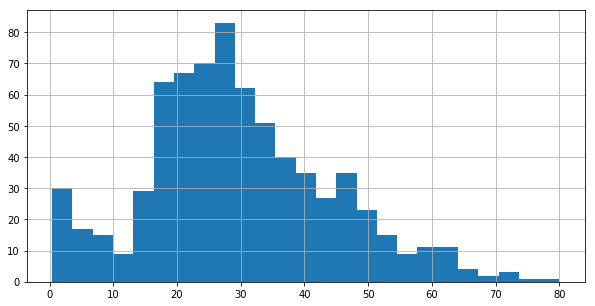

In [48]:
data['Age'].hist( bins= 25,figsize = (10,5))

# ### Упражнение

Загрузите в датафрейм mountains содержимое файла Mountains.csv. Посчитайте следующие показатели:
1. Минимальную и максимальную высоту гор в этом наборе

2. В каком году было впервые покорено наибольшее количество вершин (столбец First ascent)?

3. Постройте распределение распределение First ascent по годам

In [ ]:
mountains = pd.read_csv('Mountains.csv', delimiter=',')

In [ ]:
mountains.describe()

In [ ]:
mountains['First ascent'].value_counts()

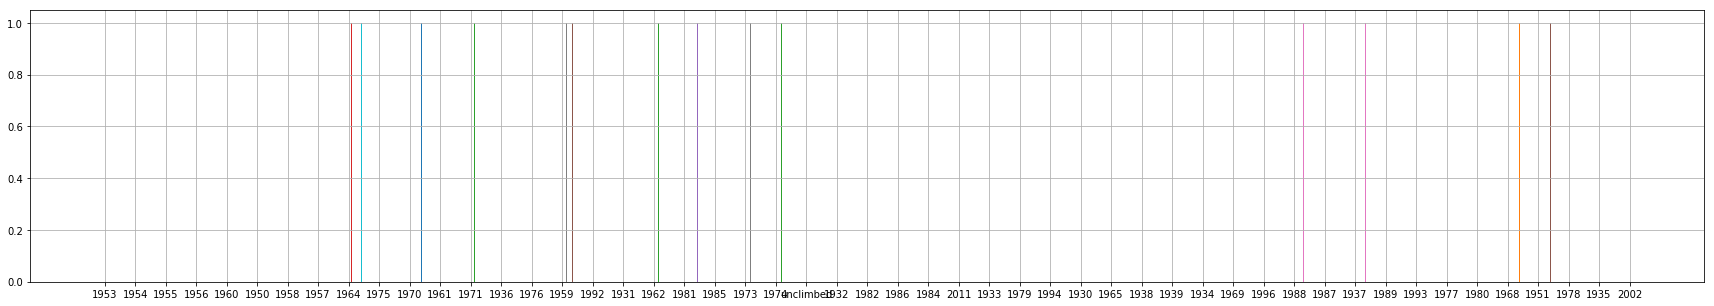

In [46]:
mountains['First ascent'].hist(bins= 100,figsize = (30,5))

# Поэлементные действия с DataFrame

In [ ]:
# зададим два DataFrame
df1 = pd.DataFrame([(0,1),(2,3),(4,5)], columns = ['value1','value2'])
df1

In [ ]:
df2 = pd.DataFrame([(10,11),(12,13),(14,15),(17,18)], columns = ['value1','value3'])
df2

In [ ]:
# Функция сложения
df1.add(df2)

In [ ]:
# для несовпадающих строк используем значение из fill_value
df1.add(df2,fill_value = 100).fillna(0)

# mul - перемножение

In [24]:
df1.mul(df2,fill_value=0)

,value1,value2,value3
0,0.0,0.0,0.0
1,24.0,0.0,0.0
2,56.0,0.0,0.0
3,0.0,NaN,0.0


# div - поэлементное деление 

In [ ]:
df1.div(df2,fill_value=17)

# Разность DataFrame

In [ ]:
df1.sub(df2)

# Корректное копирование DataFrame

In [ ]:
# Зададим DataFrame
df1 = pd.DataFrame( [ (0, 1) ],columns = ['value1','value2'] )
df1

In [ ]:
# делаем его копию
df2 = df1

In [ ]:
# Изменяем значение ячейки в копии
df2['value1'][0] = 555

In [ ]:
df2

Смотрим что произошло с исходником

In [ ]:
df1

Сделаем настоящую копию

In [ ]:
df1 = pd.DataFrame( [ (0, 1) ],columns = ['value1','value2'] )
df1

In [ ]:
df2 = df1.copy()

In [ ]:
df2['value1'][0] = 555

In [ ]:
df2

In [ ]:
df1

# Сводные таблицы

In [ ]:
data = pd.read_csv( 'train.csv', delimiter = ',' )
data.head()

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html
# index - значения столбца, которые будут в строках
# columns - значения столбца, которые образуют столбцы
# values - значения в ячейках таблицы
# aggfunc - функция, которая будет применена к значениям

# среднее значение столбца 'Age' в разбивке по Sex и Embarked
pd.pivot_table( data, index = ['Sex', 'Pclass'], columns = ['Embarked'], values = 'Age', aggfunc = np.mean )